<a href="https://colab.research.google.com/github/Tawheed-DS/Zenatix-Assignment/blob/main/Tawheed_Assignment_Zenatix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [838]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [839]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [840]:
path = '/content/drive/MyDrive/Data files/AC_Data.csv'

data = pd.read_csv(path)

In [841]:
data.shape

(87840, 19)

In [842]:
data.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [843]:
data.tail()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87839,2019-09-30 23:59:00,1.430442,6.078281,1.891162,0.000000,1.577491,4.364239,3.126339,3.287224,3.986978,2.013912,4.821829,3.363855,3.380110,1.949240,4.026304,1.862166,3.009434,7.179719


In [844]:
# Print Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In [845]:
# Percentage of data missing for each AC
data.isnull().sum()/data.shape[0] *100

0         0.000000
AC 1     50.241348
AC 2     50.237933
AC 3     50.235656
AC 4     50.245902
AC 5     50.232240
AC 6     50.231102
AC 7     50.274362
AC 8     50.245902
AC 9     50.302823
AC 10    50.261840
AC 11    50.284608
AC 12    50.235656
AC 13    50.228825
AC 14    50.255009
AC 15    50.233379
AC 16    50.239071
AC 17    50.234517
AC 18    50.224271
dtype: float64

##Observations
* <b/>Power consumption in the dataset is given for every minute, every hour, every day and each of the two months of august and september.
* Power consumption, it seems to be, is being recorded after every one minute gap, and that is why 50% of data is missing for each AC.</b>

##Feature Engineering

In [846]:
# Convert timestamp string into datetime format
data['datetime'] = pd.to_datetime(data['0'])

In [847]:
# Drop timestamp string
data.drop(['0'],axis=1,inplace=True)

In [848]:
data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,datetime
0,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:01:00
2,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:03:00
4,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00


In [849]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AC 1      43708 non-null  float64       
 1   AC 2      43711 non-null  float64       
 2   AC 3      43713 non-null  float64       
 3   AC 4      43704 non-null  float64       
 4   AC 5      43716 non-null  float64       
 5   AC 6      43717 non-null  float64       
 6   AC 7      43679 non-null  float64       
 7   AC 8      43704 non-null  float64       
 8   AC 9      43654 non-null  float64       
 9   AC 10     43690 non-null  float64       
 10  AC 11     43670 non-null  float64       
 11  AC 12     43713 non-null  float64       
 12  AC 13     43719 non-null  float64       
 13  AC 14     43696 non-null  float64       
 14  AC 15     43715 non-null  float64       
 15  AC 16     43710 non-null  float64       
 16  AC 17     43714 non-null  float64       
 17  AC 18     43

In [850]:
# Define helper functions to extract month, day and hour
def month(dateTime):
  return datetime.date(dateTime).month

def day(dateTime):
  return datetime.date(dateTime).day

def hour(dateTime):
  return datetime.time(dateTime).hour

In [851]:
# Create a month column
data['month'] = data['datetime'].apply(month)

# Create a day column
data['day'] = data['datetime'].apply(day)

#Create an hour column
data['hour'] = data['datetime'].apply(hour)

In [852]:
data.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,datetime,month,day,hour
0,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00,8,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:01:00,8,1,0
2,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00,8,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:03:00,8,1,0
4,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00,8,1,0


##Dealing with Null Values

<b/>Null values in our case need not be removed straight away. We will transform the dataset to give us hourly and daily power consumption thus eliminating the need for minute to minute availability of data. </b>

In [853]:
# Create a copy of above data
new_df = data.copy()

In [854]:
new_df.fillna(0,inplace=True)

In [855]:
print('Hours :',new_df.hour.unique())
print("Days :",new_df.day.unique())
print("Months :",new_df.month.unique())

Hours : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Days : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Months : [8 9]


In [856]:
# Create only AC's dataframe
ac_df = new_df.iloc[:,:18]

In [857]:
ac_df.head(1)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.22206,2.151238,1.585072,0.560373,3.142941,2.74947,5.417774,4.11346,3.305072,6.735981


In [858]:
# Hourly consumption of power in all AC's in watts through the months of august and september 
hourly_df = new_df.groupby(['month','hour'],as_index=False).agg({'AC 1':'sum','AC 2':'sum', 'AC 3':'sum', 'AC 4':'sum', 'AC 5':'sum', 'AC 6':'sum', 'AC 7':'sum'
                                  ,'AC 8':'sum', 'AC 9':'sum', 'AC 10':'sum', 'AC 11':'sum', 'AC 12':'sum', 'AC 13':'sum'
                                   , 'AC 14':'sum', 'AC 15':'sum', 'AC 16':'sum', 'AC 17':'sum', 'AC 18':'sum'})

In [859]:
hourly_df.head()

,month,hour,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,8,0,3120.304442,4424.217386,2452.611949,2475.950995,1368.535430,2608.841387,3432.255884,2922.665952,3466.585732,1926.521868,2940.759069,3191.637622,4523.666270,3457.015174,4712.369035,3584.332546,2869.013141,4970.353589
1,8,1,3190.515598,4256.212569,2516.742198,2482.591014,1329.353386,2675.986514,3311.846589,2866.886756,3379.946839,1817.438359,2999.618928,3127.177966,4320.000320,3463.003060,4607.751753,3616.360133,2459.442495,3909.117886
2,8,2,3173.984538,4303.350055,2551.489828,2667.706978,1396.175285,2803.787954,3309.439501,2855.627261,3360.479040,1847.844352,2863.108099,3255.520049,4082.735058,3395.641840,4844.100438,3575.466337,2636.642560,3493.796554
3,8,3,3040.320189,4242.885373,2540.399488,2594.244080,1348.165036,2644.397321,3307.142308,2844.708395,3284.705609,1886.770651,2968.940458,3272.436927,3953.344011,3533.223732,4815.611468,3463.408381,2772.550072,3385.644059
4,8,4,2915.538058,4118.351680,2495.437653,2571.553638,1355.229713,2526.517727,3296.930470,2740.151189,3367.088089,1838.996377,2850.774322,3119.938972,3967.066257,3393.255932,4723.066929,3403.965793,3083.957848,3793.714157


In [860]:
hourly_df[ac_df.columns].describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2166.612979,3523.190582,2339.019938,2180.791776,1294.812659,2293.446498,2712.541861,2320.601171,2896.063002,1400.213083,2189.087294,2458.527104,3898.179812,2655.553370,3685.067905,2549.795735,3842.259633,5886.824357
std,503.196917,405.336935,234.121375,275.677347,119.990826,451.455328,396.972796,509.580416,392.278187,267.682889,524.977130,482.527375,364.835841,665.780533,681.462432,515.959239,536.539725,1176.386791
min,1480.171283,2890.362158,1903.945288,1656.272819,1054.134105,1628.245096,1972.584203,1492.636850,2303.016384,937.056996,1223.696453,1631.245812,3291.898824,1529.652159,2377.439513,1634.989479,2459.442495,3385.644059
25%,1737.856297,3236.741560,2157.794904,1964.322976,1220.179661,1951.940004,2350.750391,1878.489690,2585.309459,1198.128103,1810.906622,2107.213056,3645.747117,2177.052078,3166.536476,2178.111415,3407.882107,5116.018383
50%,2053.613435,3468.118239,2377.340892,2161.249391,1282.129831,2206.189324,2704.593268,2141.905521,2754.298910,1310.721965,2098.974976,2298.461869,3877.435432,2407.962855,3656.609324,2408.167449,4124.827971,6217.238866
75%,2636.596560,3813.391169,2503.633342,2420.301526,1352.182560,2583.520505,3078.101969,2812.025034,3271.064787,1619.025580,2710.259503,2980.780917,4064.276937,3331.379759,4299.421079,2902.888368,4233.651226,6634.447618
max,3190.515598,4424.217386,2828.961583,2667.706978,1545.589268,3198.703783,3432.255884,3301.823183,3540.922979,1926.521868,2999.618928,3272.436927,4822.765716,3950.813750,4844.100438,3616.360133,4445.602788,7970.375206


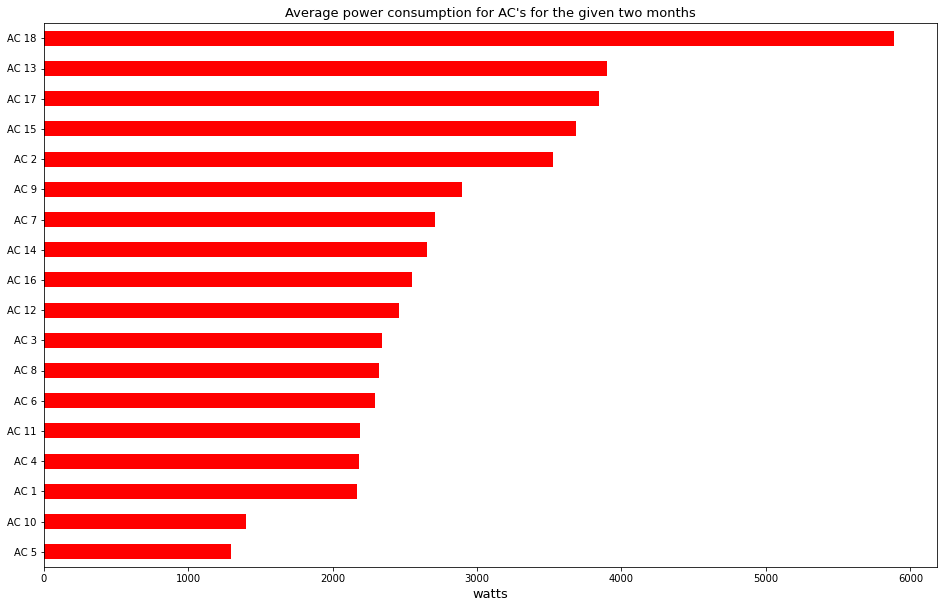

In [861]:
# Plot average power consumption in all AC's
plt.figure(figsize=(16,10))
plt.title("Average power consumption for AC's for the given two months",size=13)
plt.xlabel('watts',size=13)
hourly_df[ac_df.columns].describe().loc['mean'].sort_values(ascending=True).plot(kind='barh',color='r')

In [862]:
# Higest average hourly power consumption 
print('Highest Average power consumption',hourly_df[ac_df.columns].describe().loc['mean'].sort_values(ascending=False)[:1])

# Lowest average hourly power consumption 
print('Lowest Average power consumption',hourly_df[ac_df.columns].describe().loc['mean'].sort_values(ascending=True)[:1])

Highest Average power consumption AC 18    5886.824357
Name: mean, dtype: float64
Lowest Average power consumption AC 5    1294.812659
Name: mean, dtype: float64


##Observations:

* <b/>AC 18 which could be an AC in the room 18 has the highest average power 
consumption of about 5887 watts which is 5.9 units approx
* AC 5 has the lowest average power consumption of 1294 watts which is approx 1.2 units for the two months of august and september </b>

###Let's see if the scene would be any different month wise

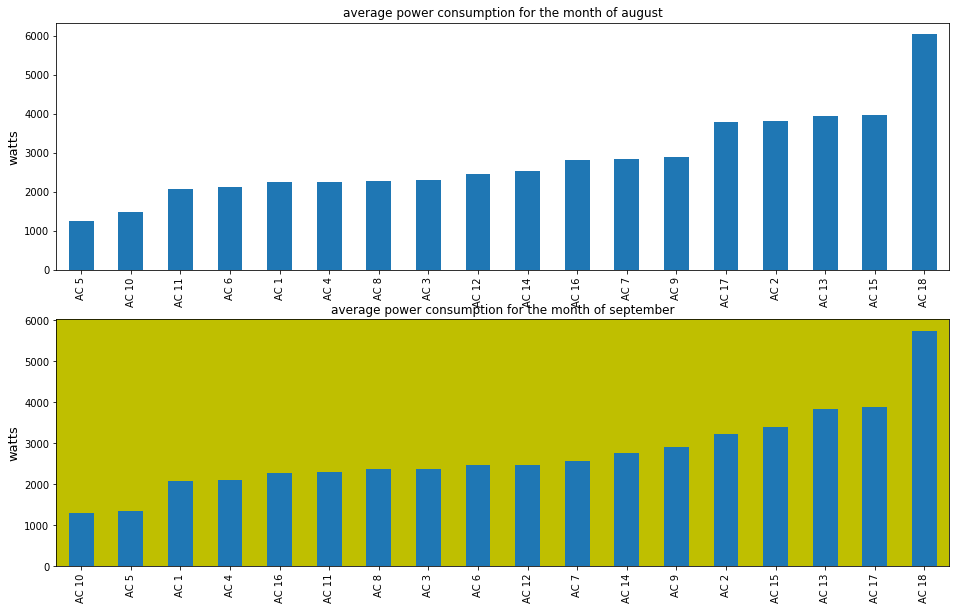

In [863]:
plt.figure(figsize=(16,10))
plt.subplot(211)
plt.title('average power consumption for the month of august')
plt.ylabel('watts',size=13)
hourly_df.query('month==8').describe().loc['mean'].iloc[2:].sort_values().plot(kind='bar')
plt.subplot(212,facecolor='y')
plt.title('average power consumption for the month of september')
plt.ylabel('watts',size=13)
hourly_df.query('month==9').describe().loc['mean'].iloc[2:].sort_values().plot(kind='bar')

In [864]:
# Top average power consumptions in the month of august
print('Highest average consumption august: ',hourly_df.query('month==8').describe().loc['mean'].iloc[2:].sort_values(ascending=False)[:1])

# Lowest average power consumptions in the month of august
print('Lowest average consumption august: ',hourly_df.query('month==8').describe().loc['mean'].iloc[2:].sort_values(ascending=True)[:1])

Highest average consumption august:  AC 18    6034.661077
Name: mean, dtype: float64
Lowest average consumption august:  AC 5    1248.533182
Name: mean, dtype: float64


In [865]:
# Top  average power consumptions in the month of september
print('Highest average consumption september: ',hourly_df.query('month==9').describe().loc['mean'].iloc[2:].sort_values(ascending=False)[:1])

# Lowest average power consumptions in the month of september
print('Lowest average consumption september: ',hourly_df.query('month==9').describe().loc['mean'].iloc[2:].sort_values(ascending=True)[:1])

Highest average consumption september:  AC 18    5738.987637
Name: mean, dtype: float64
Lowest average consumption september:  AC 10    1308.442803
Name: mean, dtype: float64


##Observations:

* <b/>Top average power consumption for combined usage in the months of august and september is for AC 18 which means AC 18 has been used the most.
* Least power consumption for the given months of august and september is for AC 5 which means that AC 5 has been used the least.
* Lowest average power consumption is for AC 5 and AC 10 for the months of august and september respectively.
* Highest average power consumption is higher and the lowest average power consumption is lower for the month of August when compared to september. </b>


In [866]:
# Create a new column for total hourly consumption
hourly_df['total_hourly_consumption'] = hourly_df.sum(axis=1)
hourly_df['average_hourly_consumption'] = hourly_df.mean(axis=1)

In [867]:
# Create a new column for total units of electricity consumed per hour
# 1 unit = 1000W/hour or 1KW/h
hourly_df['total_units_consumed'] = round(hourly_df['total_hourly_consumption'] /1000,3)
hourly_df['average_units_consumed'] = round(hourly_df['average_hourly_consumption'] /1000,3)

In [868]:
hourly_df.head()

,month,hour,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,total_hourly_consumption,average_hourly_consumption,total_units_consumed,average_units_consumed
0,8,0,3120.304442,4424.217386,2452.611949,2475.950995,1368.535430,2608.841387,3432.255884,2922.665952,3466.585732,1926.521868,2940.759069,3191.637622,4523.666270,3457.015174,4712.369035,3584.332546,2869.013141,4970.353589,58455.637468,5567.203568,58.456,5.567
1,8,1,3190.515598,4256.212569,2516.742198,2482.591014,1329.353386,2675.986514,3311.846589,2866.886756,3379.946839,1817.438359,2999.618928,3127.177966,4320.000320,3463.003060,4607.751753,3616.360133,2459.442495,3909.117886,56338.992362,5365.618320,56.339,5.366
2,8,2,3173.984538,4303.350055,2551.489828,2667.706978,1396.175285,2803.787954,3309.439501,2855.627261,3360.479040,1847.844352,2863.108099,3255.520049,4082.735058,3395.641840,4844.100438,3575.466337,2636.642560,3493.796554,56426.895726,5373.990069,56.427,5.374
3,8,3,3040.320189,4242.885373,2540.399488,2594.244080,1348.165036,2644.397321,3307.142308,2844.708395,3284.705609,1886.770651,2968.940458,3272.436927,3953.344011,3533.223732,4815.611468,3463.408381,2772.550072,3385.644059,55909.897558,5324.752148,55.910,5.325
4,8,4,2915.538058,4118.351680,2495.437653,2571.553638,1355.229713,2526.517727,3296.930470,2740.151189,3367.088089,1838.996377,2850.774322,3119.938972,3967.066257,3393.255932,4723.066929,3403.965793,3083.957848,3793.714157,55573.534805,5292.717600,55.574,5.293


### Following Graph shows total hourly power consumption for the months of august and september 

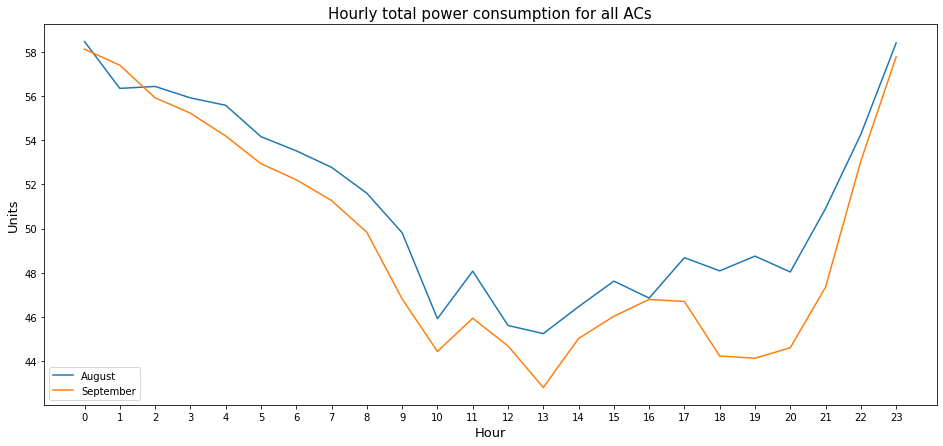

In [869]:
plt.figure(figsize=(16,7))
plt.plot(range(24),hourly_df.query('month==8').total_units_consumed,label='August')
plt.plot(range(24),hourly_df.query('month==9').total_units_consumed,label = 'September')
plt.title('Hourly total power consumption for all ACs',size=15)
plt.xlabel('Hour',size=13)
plt.ylabel('Units',size=13)
plt.xticks(ticks=range(24))
plt.legend()
plt.show()

###The following graph depicts average power consumption per AC on an hourly basis

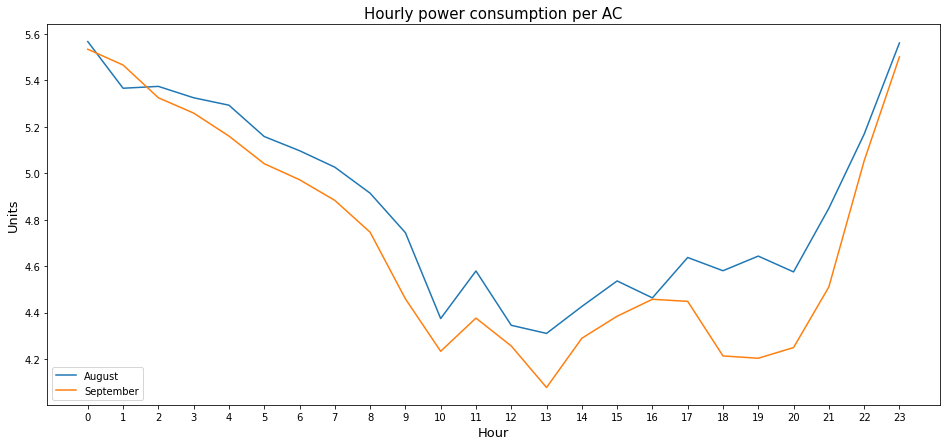

In [870]:
plt.figure(figsize=(16,7))
plt.plot(range(24),hourly_df.query('month==8').average_units_consumed,label='August')
plt.plot(range(24),hourly_df.query('month==9').average_units_consumed,label = 'September')
plt.title('Hourly power consumption per AC',size=15)
plt.xlabel('Hour',size=13)
plt.ylabel('Units',size=13)
plt.xticks(ticks=range(24))
plt.legend()
plt.show()

In [871]:
# Total units of electricity consumed per month
hourly_df.groupby('month').agg({'total_units_consumed':'sum'})

,total_units_consumed
month,
8,1227.509
9,1187.500


Text(0.5, 1.0, "Total units consumed in two months by AC's")

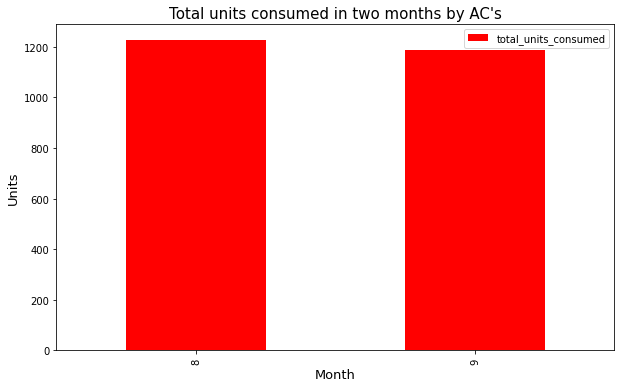

In [872]:
# Plot total power consumed in each month
plt.rcParams['figure.figsize']= (10,6)
hourly_df.groupby('month').agg({'total_units_consumed':'sum'}).plot(kind='bar',color='r')
plt.ylabel('Units',size=13)
plt.xlabel('Month',size=13)
plt.title("Total units consumed in two months by AC's",size=15)

<b>Overall power consumption is a bit higher in August as compared to September</b>

##Observations:
* <b/>There are distinct peak and non-peak hours for the power consumption by AC's
* Average Power consumption in the Hotel rooms drops during the night hours, falling Sharply during the morning hours.
* Power consumption remains low past 10:00 AM, as guests are expected to go out during the day for shopping, work, etc.
* AC usage starts to increase sharply past 8:00 PM in the evening peaking towards the mid-night </b>

##**Obtaining temperature data**

###I couldn't download the weather data directly using API, i instead downloaded the weather data for gurgaon for the two months of august and september as a csv file from visualcrossing.com

In [873]:
# Load the data from drive
temperature_df = pd.read_csv("/content/drive/MyDrive/Data files/history_data.csv")

In [874]:
temperature_df.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Gurugram, HR, India",08/01/2019,35.3,28.6,31.6,NaN,45.3,0.20,NaN,NaN,8.7,104.21,NaN,1.9,60.9,73.22,"Rain, Partially cloudy"
1,"Gurugram, HR, India",08/02/2019,33.7,27.6,29.7,NaN,43.8,10.80,NaN,NaN,9.8,107.08,23.0,1.6,55.5,82.13,"Rain, Partially cloudy"
2,"Gurugram, HR, India",08/03/2019,31.4,27.4,28.7,NaN,42.5,13.40,NaN,NaN,9.8,97.00,NaN,1.5,69.9,88.14,"Rain, Partially cloudy"
3,"Gurugram, HR, India",08/04/2019,35.4,27.6,29.9,NaN,47.8,16.61,NaN,NaN,6.1,80.08,17.2,1.4,60.7,86.44,"Rain, Partially cloudy"
4,"Gurugram, HR, India",08/05/2019,35.0,27.7,30.7,NaN,46.7,0.87,NaN,NaN,6.9,134.67,17.2,1.3,56.6,83.24,"Rain, Partially cloudy"


In [875]:
# A primary check
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 61 non-null     object 
 1   Date time            61 non-null     object 
 2   Maximum Temperature  61 non-null     float64
 3   Minimum Temperature  61 non-null     float64
 4   Temperature          61 non-null     float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           61 non-null     float64
 7   Precipitation        61 non-null     float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           61 non-null     float64
 11  Wind Direction       61 non-null     float64
 12  Wind Gust            17 non-null     float64
 13  Visibility           61 non-null     float64
 14  Cloud Cover          61 non-null     float64
 15  Relative Humidity    61 non-null     float

In [876]:
# Drop all the columns having null values and unnecessary columns
temperature_df.drop(['Name','Wind Chill','Snow','Snow Depth','Wind Gust','Conditions','Maximum Temperature','Minimum Temperature'],axis=1,inplace=True)

In [877]:
# Convert date time column into type datetime as dateTime column
temperature_df['dateTime'] = pd.to_datetime(temperature_df['Date time'])

In [878]:
# Drop Date time column
temperature_df.drop('Date time',axis=1,inplace=True)

In [879]:
# Create day and month columns
temperature_df['month'] = temperature_df['dateTime'].apply(month)
temperature_df['day'] = temperature_df['dateTime'].apply(day)


In [880]:
temperature_df.drop('dateTime',axis=1,inplace=True)

In [881]:
temperature_df.head()

,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,month,day
0,31.6,45.3,0.20,8.7,104.21,1.9,60.9,73.22,8,1
1,29.7,43.8,10.80,9.8,107.08,1.6,55.5,82.13,8,2
2,28.7,42.5,13.40,9.8,97.00,1.5,69.9,88.14,8,3
3,29.9,47.8,16.61,6.1,80.08,1.4,60.7,86.44,8,4
4,30.7,46.7,0.87,6.9,134.67,1.3,56.6,83.24,8,5


###**Create a new summarized dataframe for daily consumption**

In [882]:
# Create a daily consumption dataframe
daily_df = new_df.groupby(['month','day'],as_index=False).agg({'AC 1':'sum','AC 2':'sum', 'AC 3':'sum', 'AC 4':'sum', 'AC 5':'sum', 'AC 6':'sum', 'AC 7':'sum'
                                  ,'AC 8':'sum', 'AC 9':'sum', 'AC 10':'sum', 'AC 11':'sum', 'AC 12':'sum', 'AC 13':'sum'
                                   , 'AC 14':'sum', 'AC 15':'sum', 'AC 16':'sum', 'AC 17':'sum', 'AC 18':'sum'})

In [883]:
# Create a new column for total hourly consumption
daily_df['total_daily_consumption'] = daily_df.sum(axis=1)
daily_df['average_daily_consumption_perAC'] = daily_df.mean(axis=1)

# Create a new column for total units of electricity consumed per hour
# 1 unit = 1000W/hour or 1KW/h
daily_df['total_units_consumed_daily'] = round(daily_df['total_daily_consumption'] /1000,3)
daily_df['average_units_consumed_daily_perAC'] = round(daily_df['average_daily_consumption_perAC'] /1000,3)

In [884]:
daily_df.head()

,month,day,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,total_daily_consumption,average_daily_consumption_perAC,total_units_consumed_daily,average_units_consumed_daily_perAC
0,8,1,3104.309104,5178.653314,1630.817266,2374.203867,1037.301305,2015.883705,1876.576564,2340.438797,1620.642612,1268.278059,1291.303646,1828.139131,3391.582242,2200.493267,3094.283539,2603.788367,3337.813885,5443.447364,45646.956034,4347.329146,45.647,4.347
1,8,2,2858.419734,3593.581977,2089.322640,2271.603933,1178.239035,1685.658280,1678.985550,1068.449478,1895.803388,1267.474739,1441.221452,2011.115215,3687.542111,1693.435960,3199.127000,2471.211457,3193.061892,5596.797988,42891.051829,4084.862079,42.891,4.085
2,8,3,2342.643465,3080.604766,2109.504047,1368.851146,986.814506,1839.578327,2291.289651,924.835843,1980.989410,1052.104862,1565.555856,2213.709985,3457.940043,1340.961746,3214.434392,2109.495541,3152.205214,5668.015362,40710.534163,3877.193730,40.711,3.877
3,8,4,2950.357777,3138.325802,1849.015820,1113.272698,1099.236903,2546.160319,2014.250945,1116.094952,1790.919247,1209.314592,1311.968897,2169.716325,3532.554241,1585.776477,3307.656537,2055.193141,3216.802219,5907.917356,41926.534247,3993.003262,41.927,3.993
4,8,5,2541.984791,2883.849849,1285.868449,647.581450,1202.556730,2731.833220,1787.944404,1182.123289,1869.045967,1020.467613,2410.518340,2237.245534,3003.746657,2011.984857,3593.211800,2487.589814,2740.861509,4394.006700,40045.420973,3813.849617,40.045,3.814


In [885]:
# Create a summary dataframe
daily_summary_df = daily_df[['month','day','total_units_consumed_daily','average_units_consumed_daily_perAC']]

In [886]:
daily_summary_df.head()

,month,day,total_units_consumed_daily,average_units_consumed_daily_perAC
0,8,1,45.647,4.347
1,8,2,42.891,4.085
2,8,3,40.711,3.877
3,8,4,41.927,3.993
4,8,5,40.045,3.814


In [887]:
# Check shapes of two dataframes
daily_summary_df.shape,temperature_df.shape

((61, 4), (61, 10))

In [888]:
# Merge the two dataframes to get a final dataframe
final_df = pd.merge(temperature_df,daily_summary_df)

In [889]:
final_df.head()

,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,month,day,total_units_consumed_daily,average_units_consumed_daily_perAC
0,31.6,45.3,0.20,8.7,104.21,1.9,60.9,73.22,8,1,45.647,4.347
1,29.7,43.8,10.80,9.8,107.08,1.6,55.5,82.13,8,2,42.891,4.085
2,28.7,42.5,13.40,9.8,97.00,1.5,69.9,88.14,8,3,40.711,3.877
3,29.9,47.8,16.61,6.1,80.08,1.4,60.7,86.44,8,4,41.927,3.993
4,30.7,46.7,0.87,6.9,134.67,1.3,56.6,83.24,8,5,40.045,3.814


Text(0, 0.5, 'Units')

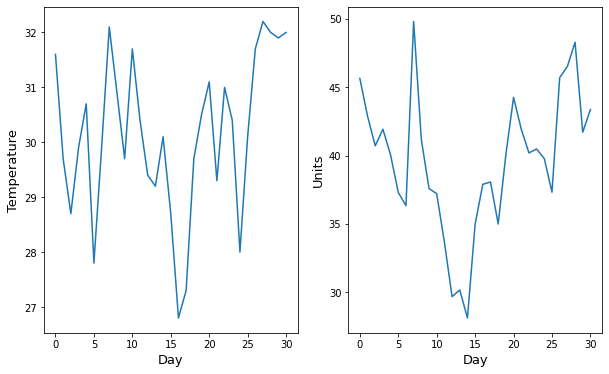

In [890]:
plt.subplot(121)
final_df.query('month==8').Temperature.plot(kind='line')
plt.xlabel('Day',size=13)
plt.ylabel('Temperature',size=13)
plt.subplot(122)
final_df.query('month==8').total_units_consumed_daily.plot(kind='line')
plt.xlabel('Day',size=13)
plt.ylabel('Units',size=13)

###Let's transform the data for a better understanding of how our daily power consumption moves with the temperature outside

In [891]:
# Import Scaler to Normalize the data
from sklearn.preprocessing import MinMaxScaler

In [892]:
# Instantiate the scaler object
scaler = MinMaxScaler()

In [893]:
# Normalize the data
matrix = scaler.fit_transform(final_df)

In [894]:
# Convert back into a dataframe
transformed_df = pd.DataFrame(matrix,columns= final_df.columns)

In [895]:
# Check transformed values of month
transformed_df['month'].unique()

array([0., 1.])

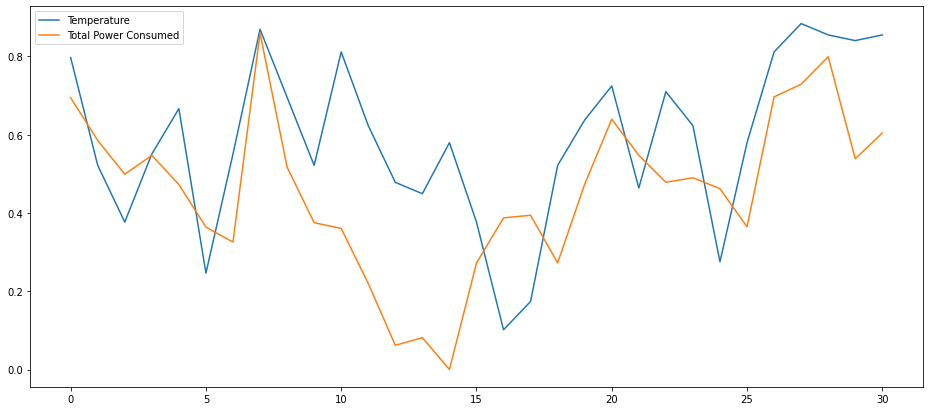

In [896]:
# Plot Temperature and power consumed together for the month of August
plt.figure(figsize=(16,7))
transformed_df.query('month==0').Temperature.plot(kind='line',label='Temperature')
transformed_df.query('month==0').total_units_consumed_daily.plot(kind='line',label='Total Power Consumed')
plt.legend()
plt.show()

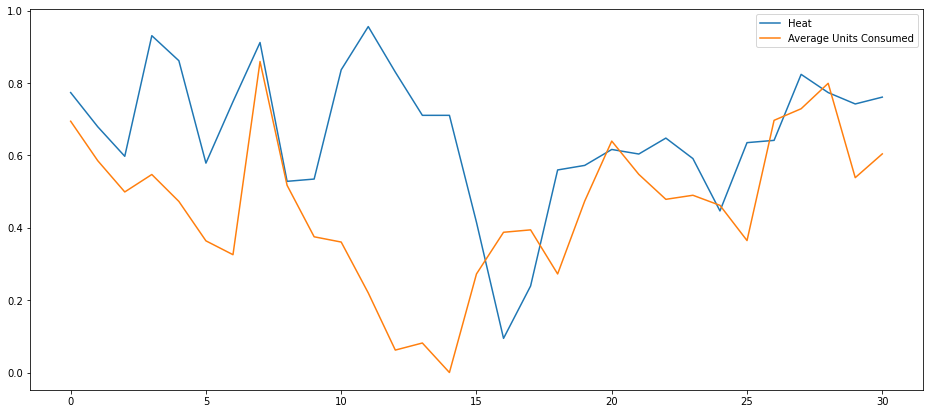

In [897]:
# Plot Heat Index and average power consumed together (August)
plt.figure(figsize=(16,7))
transformed_df.query('month==0')['Heat Index'].plot(kind='line',label='Heat')
transformed_df.query('month==0').average_units_consumed_daily_perAC.plot(kind='line',label='Average Units Consumed')
plt.legend()
plt.show()

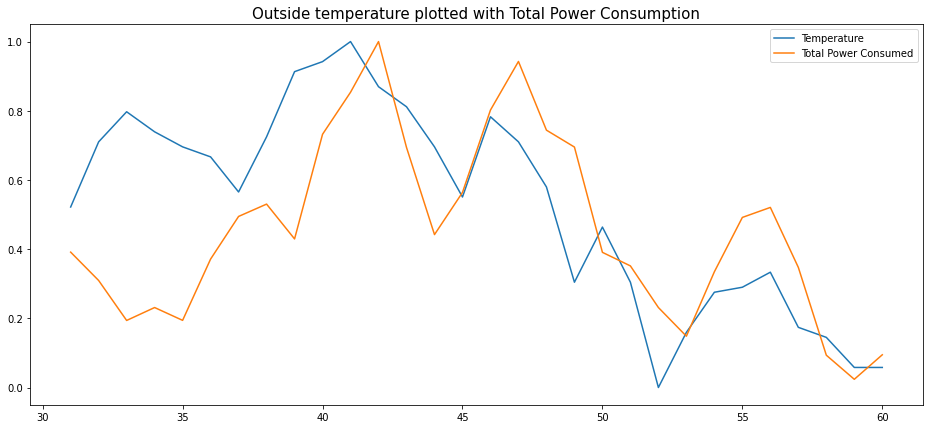

In [898]:
# Plot Temperature and power consumed together for the month of September
plt.figure(figsize=(16,7))
transformed_df.query('month==1').Temperature.plot(kind='line',label='Temperature')
transformed_df.query('month==1').total_units_consumed_daily.plot(kind='line',label='Total Power Consumed')
plt.title('Outside temperature plotted with Total Power Consumption',size=15)
plt.legend()
plt.show()

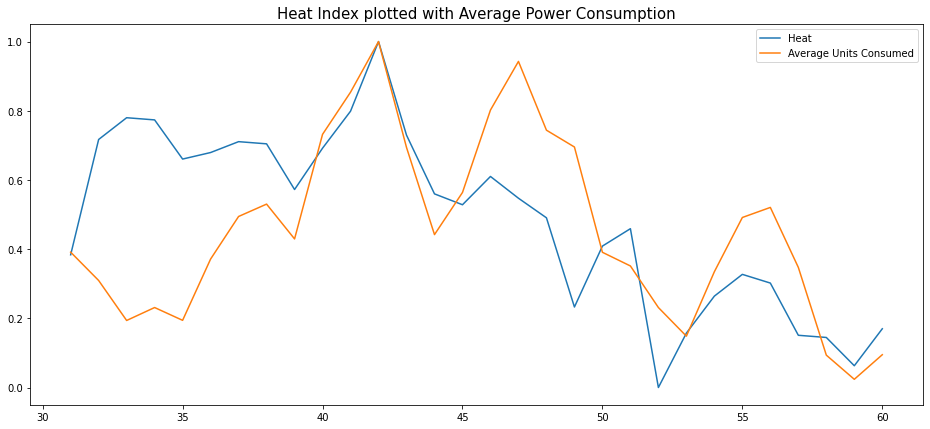

In [899]:
# Plot Heat Index and average power consumed together (August)
plt.figure(figsize=(16,7))
transformed_df.query('month==1')['Heat Index'].plot(kind='line',label='Heat')
transformed_df.query('month==1').average_units_consumed_daily_perAC.plot(kind='line',label='Average Units Consumed')
plt.title('Heat Index plotted with Average Power Consumption',size=15)
plt.legend()
plt.show()

##Observations

* <b>We can clearly see that the Total power consumption by ACs in the gurgaon hotel is moving together with the outside temperature!
* After mid-september temperature started to fall and the usage of ACs also fell correspondingly</b>

In [900]:
final_df.head()

,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,month,day,total_units_consumed_daily,average_units_consumed_daily_perAC
0,31.6,45.3,0.20,8.7,104.21,1.9,60.9,73.22,8,1,45.647,4.347
1,29.7,43.8,10.80,9.8,107.08,1.6,55.5,82.13,8,2,42.891,4.085
2,28.7,42.5,13.40,9.8,97.00,1.5,69.9,88.14,8,3,40.711,3.877
3,29.9,47.8,16.61,6.1,80.08,1.4,60.7,86.44,8,4,41.927,3.993
4,30.7,46.7,0.87,6.9,134.67,1.3,56.6,83.24,8,5,40.045,3.814


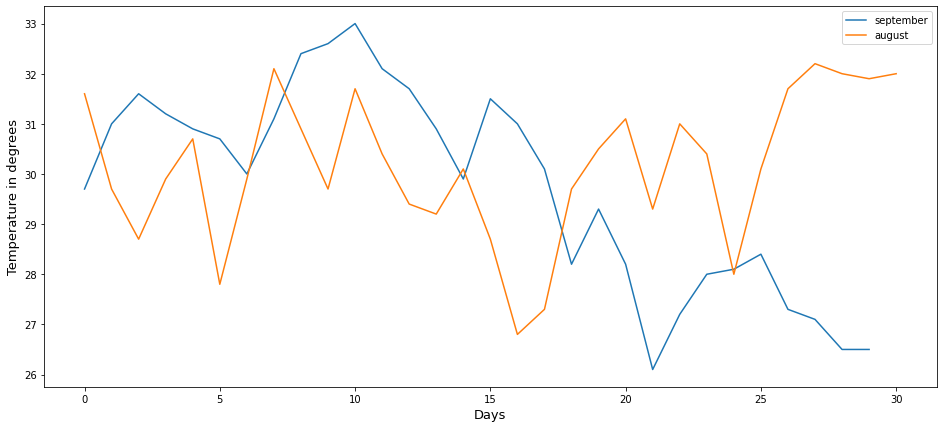

In [901]:
# Plot temperatures for the two months
plt.figure(figsize=(16,7))
plt.plot(range(30),final_df.query('month==9').Temperature,label='september')
plt.plot(range(31),final_df.query('month==8').Temperature,label='august')
plt.xlabel('Days',size=13)
plt.ylabel('Temperature in degrees',size=13)
plt.legend()
plt.show()


* <b>Earlier we had seen less overall power consumption in the month of september, that should be quite self-explanatory from this graph
* Temperature started to drop after mid-september hence usage of ACs in the Hotel rooms decreased</b>

##Prepare the dataset for modelling

In [902]:
transformed_df.head()

,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,month,day,total_units_consumed_daily,average_units_consumed_daily_perAC
0,0.797101,0.773585,0.004255,0.337209,0.181454,0.500000,0.591837,0.317697,0.0,0.000000,0.694562,0.694387
1,0.521739,0.679245,0.229787,0.465116,0.196405,0.250000,0.469388,0.605953,0.0,0.033333,0.585409,0.585447
2,0.376812,0.597484,0.285106,0.465116,0.143892,0.166667,0.795918,0.800388,0.0,0.066667,0.499069,0.498960
3,0.550725,0.930818,0.353404,0.034884,0.055744,0.083333,0.587302,0.745390,0.0,0.100000,0.547230,0.547193
4,0.666667,0.861635,0.018511,0.127907,0.340141,0.000000,0.494331,0.641863,0.0,0.133333,0.472692,0.472765


In [903]:
# Check correlation between features
transformed_df.corr()

,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,month,day,total_units_consumed_daily,average_units_consumed_daily_perAC
Temperature,1.000000,0.824957,-0.237632,-0.332215,0.169047,-0.034681,-0.500025,-0.700374,-0.115182,-0.321022,0.562833,0.562799
Heat Index,0.824957,1.000000,0.027802,-0.368655,0.182516,-0.278896,-0.203535,-0.287705,-0.356054,-0.469496,0.355569,0.355527
Precipitation,-0.237632,0.027802,1.000000,0.065358,0.020251,-0.362995,0.420791,0.518125,-0.107191,-0.208397,-0.159345,-0.159390
Wind Speed,-0.332215,-0.368655,0.065358,1.000000,-0.075033,0.276750,0.265186,0.308691,-0.116715,-0.048754,-0.197776,-0.197814
Wind Direction,0.169047,0.182516,0.020251,-0.075033,1.000000,-0.142680,-0.158390,-0.048382,-0.249583,0.044254,0.004991,0.005012
Visibility,-0.034681,-0.278896,-0.362995,0.276750,-0.142680,1.000000,-0.324525,-0.420437,0.206422,0.397753,0.063706,0.063749
Cloud Cover,-0.500025,-0.203535,0.420791,0.265186,-0.158390,-0.324525,1.000000,0.780065,-0.240639,-0.226423,-0.556965,-0.557033
Relative Humidity,-0.700374,-0.287705,0.518125,0.308691,-0.048382,-0.420437,0.780065,1.000000,-0.318492,-0.158509,-0.554649,-0.554677
month,-0.115182,-0.356054,-0.107191,-0.116715,-0.249583,0.206422,-0.240639,-0.318492,1.000000,-0.028383,-0.001249,-0.001178
day,-0.321022,-0.469496,-0.208397,-0.048754,0.044254,0.397753,-0.226423,-0.158509,-0.028383,1.000000,-0.029375,-0.029337


###Clearly there is are a number of correlated features in the dataset. We will have to choose only uncorrelated features for the ML modeling to avoid multicollinearity

In [904]:
features = ['Temperature','Precipitation','Wind Speed','Wind Direction','Visibility','Cloud Cover','Relative Humidity','total_units_consumed_daily']

In [905]:
# Check correlation again
transformed_df[features].corr()

,Temperature,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,total_units_consumed_daily
Temperature,1.000000,-0.237632,-0.332215,0.169047,-0.034681,-0.500025,-0.700374,0.562833
Precipitation,-0.237632,1.000000,0.065358,0.020251,-0.362995,0.420791,0.518125,-0.159345
Wind Speed,-0.332215,0.065358,1.000000,-0.075033,0.276750,0.265186,0.308691,-0.197776
Wind Direction,0.169047,0.020251,-0.075033,1.000000,-0.142680,-0.158390,-0.048382,0.004991
Visibility,-0.034681,-0.362995,0.276750,-0.142680,1.000000,-0.324525,-0.420437,0.063706
Cloud Cover,-0.500025,0.420791,0.265186,-0.158390,-0.324525,1.000000,0.780065,-0.556965
Relative Humidity,-0.700374,0.518125,0.308691,-0.048382,-0.420437,0.780065,1.000000,-0.554649
total_units_consumed_daily,0.562833,-0.159345,-0.197776,0.004991,0.063706,-0.556965,-0.554649,1.000000


In [906]:
# Choosing features based on low collinearity
features = ['Temperature','Precipitation','total_units_consumed_daily']

In [907]:
model_df = transformed_df[features]

In [908]:
model_df.head()

,Temperature,Precipitation,total_units_consumed_daily
0,0.797101,0.004255,0.694562
1,0.521739,0.229787,0.585409
2,0.376812,0.285106,0.499069
3,0.550725,0.353404,0.547230
4,0.666667,0.018511,0.472692


In [909]:
model_df.corr()

,Temperature,Precipitation,total_units_consumed_daily
Temperature,1.000000,-0.237632,0.562833
Precipitation,-0.237632,1.000000,-0.159345
total_units_consumed_daily,0.562833,-0.159345,1.000000


In [910]:
# Create independent and dependent varriables

X = model_df[['Temperature','Precipitation']]
y = model_df['total_units_consumed_daily']

In [911]:
# Import ML libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [912]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [913]:
# Instantiate the Linear Regressor
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [916]:
# Make Predictions on training data
y_train_preds = regressor.predict(X_train)

In [917]:
# Predicting the Test set results
y_test_preds = regressor.predict(X_test)

In [918]:
# Mean squared error on test data
mean_squared_error(y_test, y_test_preds)

0.040998424324485014

In [922]:
# Coeffecients of regression for the two features chosen for the prediction
regressor.coef_

array([ 0.48349701, -0.04368732])